Importing Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:


!pip install wordcloud




IMPORTING DATA

In [77]:
df=pd.read_csv(r'C:\Users\amit2\OneDrive\Documents\netflix\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [78]:
df.shape

(8807, 12)

In [79]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [80]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

DUPLICATED VALUES

In [81]:
df[df.duplicated()].count()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Missing Value

In [82]:
missing_count=df.isnull().sum()
missing_count

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

DIRECTOR COLUMN HAS LARGE NUMBER OF NULL VALUES SO WE DROPING IT

In [83]:
df.drop('director',axis=1,inplace=True)


In [84]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [85]:
df.shape

(7290, 11)

Top 5 Countries with Most Netflix content

In [86]:
country_counts=df['country'].value_counts()
country_counts

country
United States                                2479
India                                         940
United Kingdom                                350
Japan                                         238
South Korea                                   196
                                             ... 
Uruguay, Argentina, Germany, Spain              1
Taiwan, Malaysia                                1
France, South Korea, Japan, United States       1
Kenya, United States                            1
United Arab Emirates, Jordan                    1
Name: count, Length: 689, dtype: int64

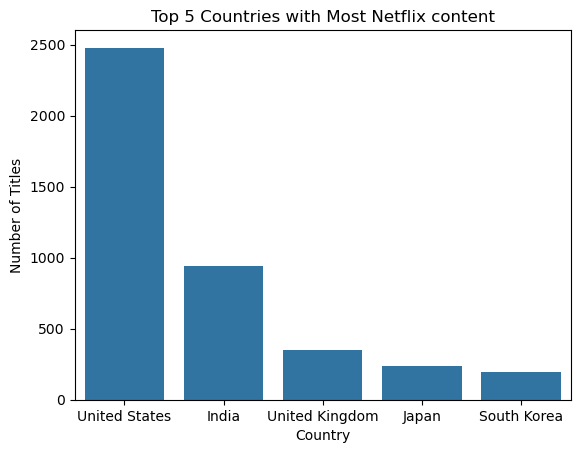

In [87]:
top5_countries=country_counts.head(5)

#plot graph
plt.Figure(figsize=(8,6))
sns.barplot(x=top5_countries.index,y=top5_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 5 Countries with Most Netflix content')
plt.show()

Netflix Genre Word Cloud

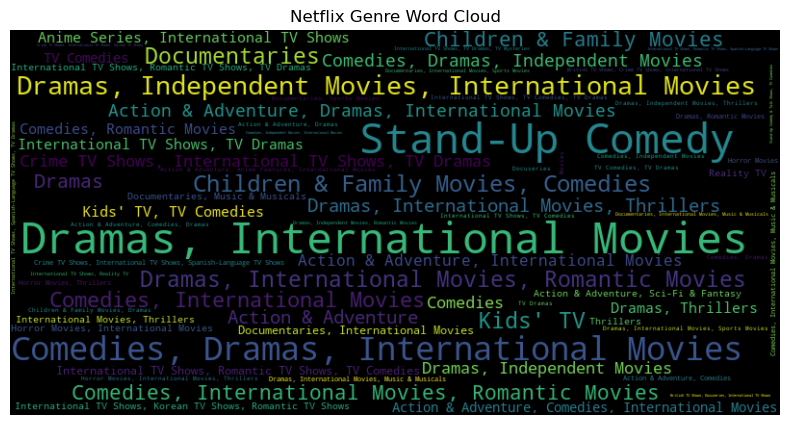

In [88]:
genre_count=df['listed_in'].value_counts()
genre_count

from wordcloud import WordCloud


# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate_from_frequencies(genre_count)

# Display
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Netflix Genre Word Cloud")
plt.show()


Proportion of Movies vs TV Shows on Netflix

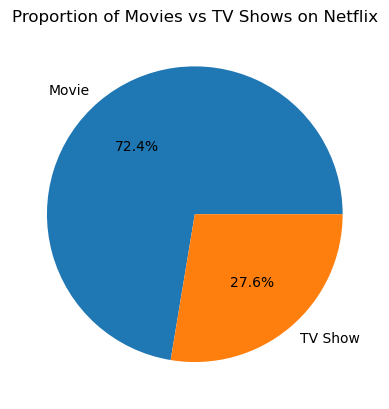

In [89]:
plt.Figure(figsize=(8,8))
count_type=df['type'].value_counts()
plt.pie(count_type.values,labels=count_type.index,autopct='%1.1f%%')
plt.title("Proportion of Movies vs TV Shows on Netflix")
plt.show()

Trend of Content Added Over the Years on Netflix

In [90]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year from the date_added column
df['year_added'] = df['date_added'].dt.year

# Drop rows where year_added is NaN (for entries without a date)
df = df.dropna(subset=['year_added'])


In [91]:
# Count titles per year
yearly_trend = df['year_added'].value_counts().sort_index()

# Display the trend
print(yearly_trend)


year_added
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      19
2015.0      61
2016.0     348
2017.0     967
2018.0    1386
2019.0    1707
2020.0    1639
2021.0    1056
Name: count, dtype: int64


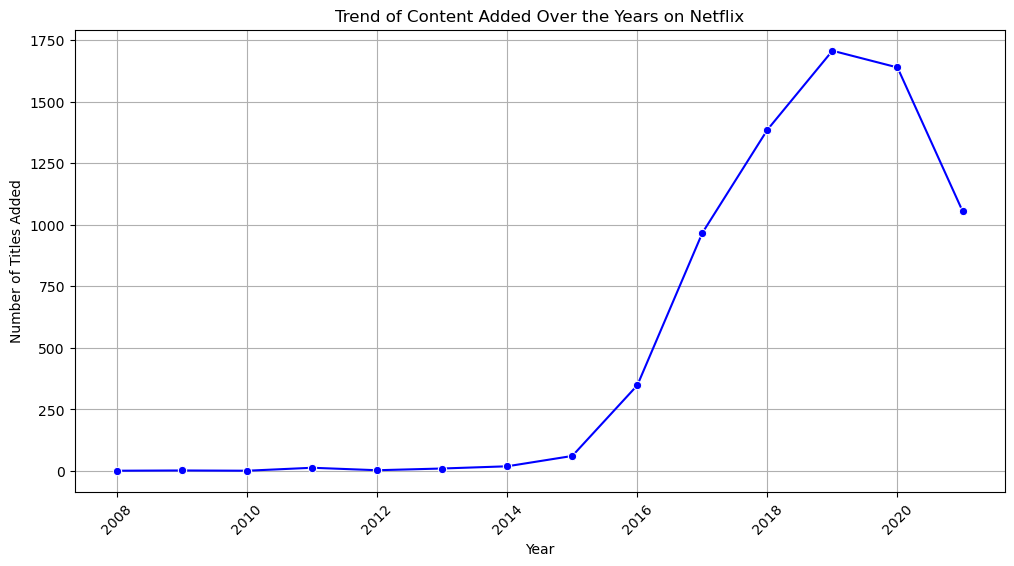

In [92]:
# Plotting the trend of content added over the years
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Trend of Content Added Over the Years on Netflix")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


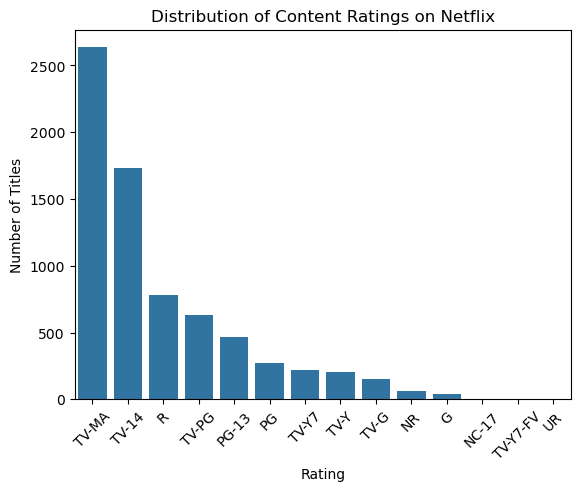

In [93]:
rating_count=df['rating'].value_counts()
plt.Figure(figsize=(8,6))
sns.barplot(x=rating_count.index,y=rating_count.values)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.title('Distribution of Content Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

Top 10 Most Common Directors on Netflix"

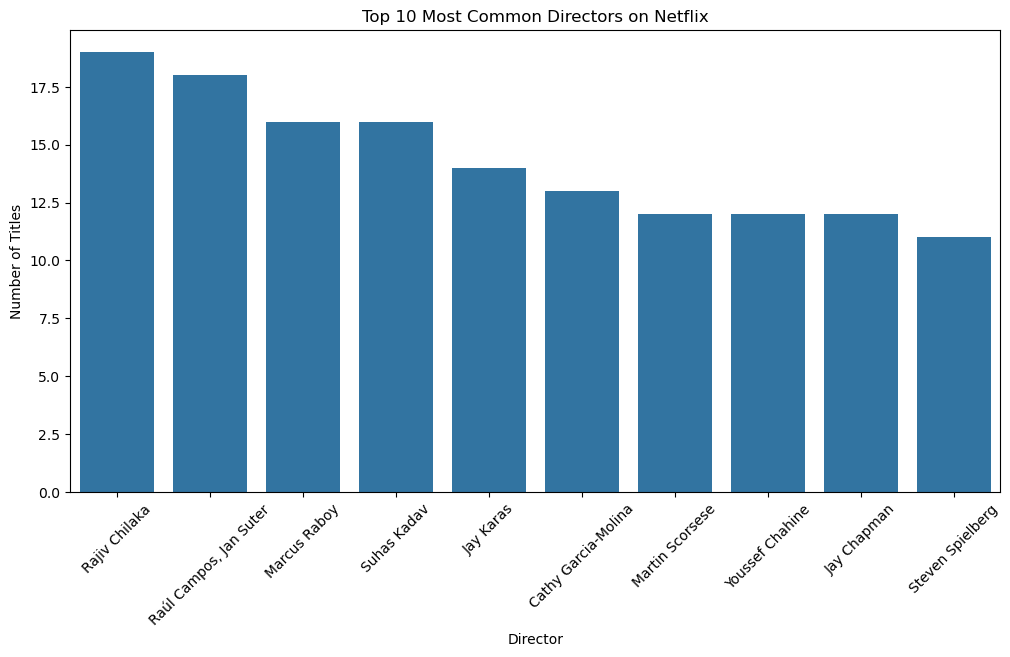

In [94]:

df = pd.read_csv(r'C:\Users\amit2\OneDrive\Documents\netflix\netflix_titles.csv')

# Now, you can proceed with the director analysis
directors = df['director'].dropna()
top_directors = directors.value_counts().head(10)

# Plotting the top 10 directors
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.title("Top 10 Most Common Directors on Netflix")
plt.xticks(rotation=45)
plt.show()


Content by Country and Type (Movies vs TV Shows)

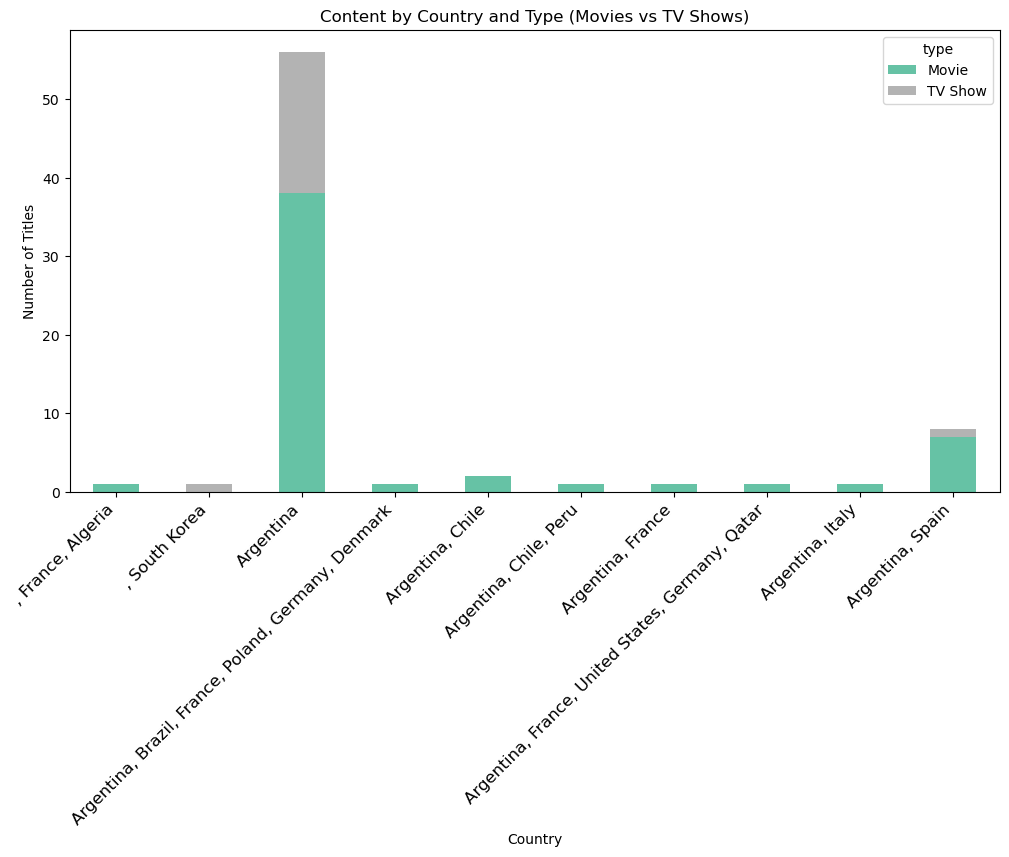

In [95]:
# Count content by country and type (movies vs TV shows)
country_type_count = df.groupby(['country', 'type']).size().unstack().fillna(0)
country_type_count
# Plot the content distribution by country and type
country_type_count.head(10).plot(kind='bar', stacked=True, figsize=(12,6), colormap="Set2")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Content by Country and Type (Movies vs TV Shows)")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()


Correlation Between Release Year and Duration

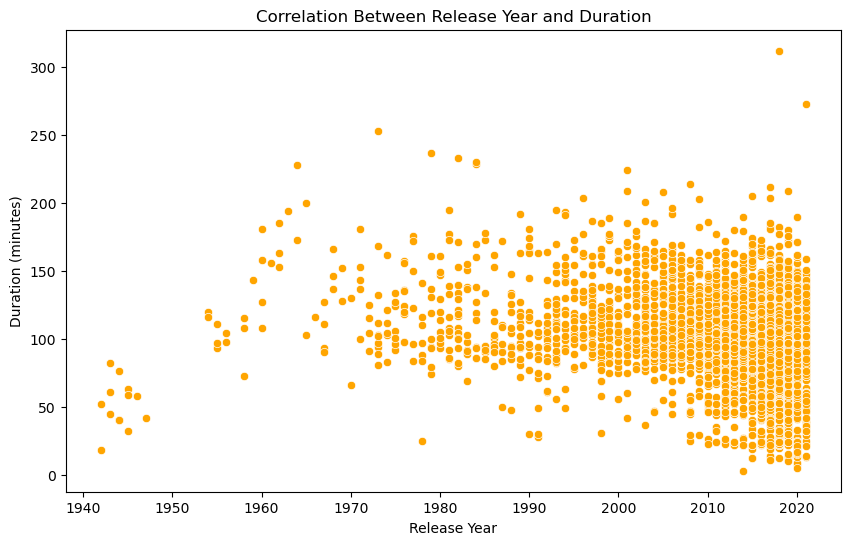

In [96]:
# Clean and convert 'duration' to numeric (remove ' min' and convert to integer)
df['duration'] = df['duration'].str.replace(' min', '', regex=False)  # Remove 'min' from duration
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convert to numeric

# Convert 'release_year' to numeric (handle errors if any)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


# Plot the correlation between release year and duration
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='release_year', y='duration', color='orange')

# Customize the plot labels and title
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.title("Correlation Between Release Year and Duration")
plt.show()
